<a href="https://colab.research.google.com/github/yishengli/GraphMiningNotebooks/blob/master/Gomez_Li_Assignment2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install python-igraph

     |████████████████████████████████| 3.2 MB 4.8 MB/s 


In [ ]:
pip install plfit

     |████████████████████████████████| 193 kB 5.2 MB/s 
  Created wheel for plfit: filename=plfit-1.0.3-cp37-cp37m-linux_x86_64.whl size=123185 sha256=290142aeb9093f71928cb0b39726f4c9e64bdffeccb2b419536907a221ca2840
  Stored in directory: /root/.cache/pip/wheels/44/c5/30/2761386f6aea1d7ca4ffb706f90535faa81365be034b32055a
Successfully built plfit


In [ ]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from collections import Counter
import plfit
from scipy.stats import poisson
from math import factorial
import multiprocessing as mp
from multiprocessing import cpu_count

# Problem 3

See the code below with the most important functions to calculate the empirical and theoretical number of isolated edges:

In [ ]:
def prob(n, c):
    """P(n) function"""
    p = (np.log(n) + np.log(np.log(n)) + c)/(2*n)
    return p

def iso_edges(g):
    """Function - Number of isolated edges of a graph"""
    isoe = 0
    clus = g.clusters()
    for clu in clus:
        if (len(clu) == 2):
            isoe += 1
    return isoe

def empirical_isoe(n, REP, C):
    """Empirical function using P(n)"""
    ie_avg = []
    ie_std = []

    for c in C: 
      x = [iso_edges(ig.Graph.Erdos_Renyi(n=n, p=prob(n, c))) for rep in range(REP)]
      ie_avg.append(np.mean(x))
      ie_std.append(np.std(x))

    return ie_avg, ie_std

def theoretical(n):
    """Theoretical values - isolated edges"""
    th = [np.exp(-c)/4 for c in C]
    return th

def plot_isoe(ie_avg, ie_stg, th, C, n):
    ie_max = [ie_avg[i] + 1.654*np.sqrt(ie_std[i]/n) for i in range(0, len(ie_avg))]
    ie_min = [ie_avg[i] - 1.654*np.sqrt(ie_std[i]/n) for i in range(0, len(ie_avg))]
    plt.fill_between(C, ie_min, ie_max, color='lightgray')
    plt.plot(C,th,color='black')
    plt.title('Theoretical predictions (black) vs empirical results (grey)')
    plt.xlabel(r'constant $c$',fontsize=14)
    plt.ylabel('Number of isolated edges',fontsize=14);

In [ ]:
#@title
## P(n) function
def prob(n, c):
    p = (np.log(n) + np.log(np.log(n)) + c)/(2*n)
    return p

## Function - Number of isolated edges of a graph
def iso_edges(g):
    isoe = 0
    clus = g.clusters()
    for clu in clus:
        if (len(clu) == 2):
            isoe += 1
    return isoe

## Empirical function using P(n)
## isoe = isolated edges
def empirical_isoe(n, REP, C):
    ie_avg = []
    ie_std = []
    for c in C:
        x = []
        for rep in range(REP):
            p = prob(n, c)
            g = ig.Graph.Erdos_Renyi(n=n, p=p)
            isoe = iso_edges(g)
            x.append(isoe)
        ie_avg.append(np.mean(x))
        ie_std.append(np.std(x))
    ##return [ie_avg, ie_min, ie_max, ie_std]
    return [ie_avg, ie_std]

## Theoretical values - isolated edges
def theoretical(n):
    th = [np.exp(-c)/4 for c in C]
    return th

## plot
def plot_isoe(ie_avg, ie_stg, th, C, n):
    ##plt.fill_between(C,[x-1.654*np.sqrt(x*(1-x)/n) for x in ie_avg],
    ##                [x+1.645*np.sqrt(x*(1-x)/n) for x in ie_avg],color='lightgray')
    ie_max = []
    ie_min = []
    for i in range(0, len(ie_avg)):
        delta = 1.654*np.sqrt(ie_std[i]/n)
        ##print('iteration = ', i, ', average = ', ie_avg[i], ' and delta = ', delta)
        ie_min.append(ie_avg[i] - delta)
        ie_max.append(ie_avg[i] + delta)
    plt.fill_between(C, ie_min, ie_max, color='lightgray')
    plt.plot(C,th,color='black')
    plt.title('Theoretical predictions (black) vs empirical results (grey)')
    plt.xlabel(r'constant $c$',fontsize=14)
    plt.ylabel('Number of isolated edges',fontsize=14);

   

Figure using n = 100

120


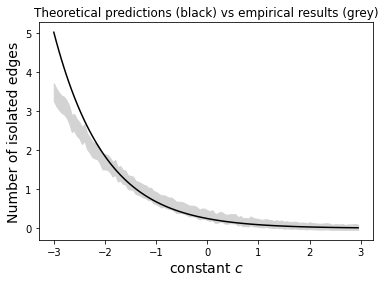

In [ ]:
REP = 1000 ##1000 repeats
C = np.arange(-3,3,.05)
n = 100
ie_avg, ie_std = empirical_isoe(n, REP, C)
th = theoretical(n)
plot_isoe(ie_avg, ie_std, th, C, n)

Figure using n = 10.000

120


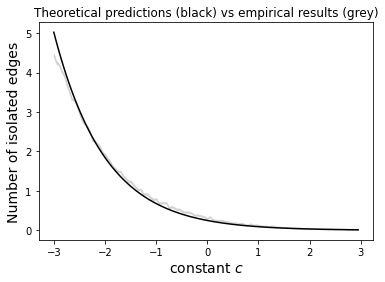

In [ ]:
REP = 1000 ##1000 repeats
C = np.arange(-3,3,.05)
n = 10000
ie_avg, ie_std = empirical_isoe(n, REP, C)
th = theoretical(n)
plot_isoe(ie_avg, ie_std, th, C, n)

# Problem 4

See the code below with the most important functions to calculate the empirical and theoretical number of cycles (2-regular random graphs):

In [ ]:
def num_cyc(D=[2]*100):
    """The default D is for the small graph (n=100)"""
    cyc = 0
    k = 3
    g = ig.Graph.Degree_Sequence(D)
    ## For every possible lenght k
    while (k <= len(g.vs())-1):
        minicycles = 0
        ## Loop through each node in g
        for n1 in g.vs():
            ## Loop through each neighbor of node n1
            neigh = g.neighbors(n1, mode = 'all')
            for n2 in neigh:
                ## Get all simple paths regardless of length
                paths = g.get_all_simple_paths(v = n1, to = n2, cutoff = k)
                if (len(paths) > 1):
                    for p in paths:
                        ##For every simple path of length k
                        if (len(p) == k):
                            ## Increase count
                            minicycles += 1
        cyc += minicycles/(2*k)
        k += 1
    return cyc

## Empirical function using random d-regular graphs
## cyc = number of cycles
def empirical_cyc_para(iter=10):
    pool = mp.Pool(4)
    # pool = mp.Pool(cpu_count)

    future_res = [pool.apply_async(num_cyc) for _ in range(iter)]
    res = [f.get() for f in future_res]
    cyc_avg = np.mean(res)
    cyc_std = np.std(res)
    
    return cyc_avg, cyc_std

## Theoretical values - number of cycles
def theoretical_cyc(n):
    th_cyc = (np.log(n)*(1/2))
    return th_cyc

The empirical values for the total number of cycles on small graphs of n = 100:

In [ ]:
n = 100
REP = 1000
th_cyc = theoretical_cyc(n)
cyc_avg, cyc_std = empirical_cyc_para(iter=REP)

In [ ]:
print('n = ', n, " | repetitions = ", REP)
print('Empirical mean is = ', cyc_avg, 'with standard deviation of ', cyc_std)

n =  100  | repetitions =  1000
Empirical mean is =  2.445 with standard deviation of  1.2700295272158044


Theoretical value

In [ ]:
print('n = ', n, " | repetitions = ", REP)
print('Theoretical value is = ', th_cyc)

n =  100  | repetitions =  1000
Theoretical value is =  2.302585092994046


The empirical values for the total number of cycles on medium graphs of n = 1000:

NOTE: By changing n to 10,000, the number of cycles for large graphs would be calculated. However, due to computational resources, it wasn´t possible to run this code without the notebook crashing (both locally and on the Google colab instance). To speed up the computation, we tried Python multiprocessing and ran the code on AWS and the GPU of Google Colab, but nevertheless it still crashed.

In [ ]:
n = 1000
##n = 10000
th_cyc = theoretical_cyc(n)
cyc_avg, cyc_std = empirical_cyc_para(iter=1000)

In [ ]:
print('n = ', n, " | repetitions = ", REP)
print('Empirical mean is = ', cyc_avg[0], 'with standard deviation of ', cyc_std[0])

In [ ]:
print('n = ', n, " | repetitions = ", REP)
print('Theoretical value is = ', th_cyc)

# Problem 6

Below is the code to calculate density using both the formula provided in the problem, and the igraph density command:

In [ ]:
n = 10000
p = 1/4
k = 2
g1 = ig.Graph.Erdos_Renyi(n=n, p=p)
g2 = ig.Graph.Erdos_Renyi(n=n, p=p)
gu = ig.union([g1, g2], byname='auto')
d = gu.density(loops=False)
d1 = (len(gu.get_edgelist()))/(factorial(n)/(factorial(k)*factorial(n - k)))

In [ ]:
print('Density value of the union of graphs g1 and g2 using the igraph command = ', d)
print('Density value of the union of graphs g1 and g2 using the formula = ', d)

Density value of the union of graphs g1 and g2 using the igraph command =  0.4374679067906791
Density value of the union of graphs g1 and g2 using the formula =  0.4374679067906791


The value of the density appears to be close enough to 2p (1/2).

# Problem 7

In [ ]:
def avg_gcc(d, s, n, p, REP):
    avg_gcc = []
    avg_avglcc = []

    for p in P:
        G = [ig.Graph.Watts_Strogatz(dim=d, size=s, nei=8, p=p) for rep in range(REP)]
        # x1 = [g.transitivity_undirected() for g in G]
        # x2 = [g.transitivity_avglocal_undirected() for g in G]
        avg_gcc.append(np.mean([g.transitivity_undirected() for g in G]))
        avg_avglcc.append(np.mean([g.transitivity_avglocal_undirected() for g in G]))

    return avg_gcc, avg_avglcc 

In [ ]:
P = np.arange(0.1, 1, 0.02)
# P = np.arange(0.1, 0.6, 0.02)
REP = 5

avg_gcc, avg_avglcc = avg_gcc(2, 100, 8, P, REP)

Text(0, 0.5, 'global cluster coefficient')

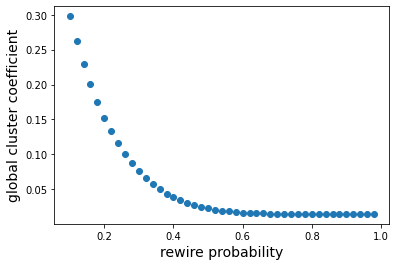

In [ ]:
plt.scatter(P, avg_gcc)
plt.xlabel('rewire probability',fontsize=14)
plt.ylabel('global cluster coefficient',fontsize=14)

Text(0, 0.5, 'average local cluster coefficient')

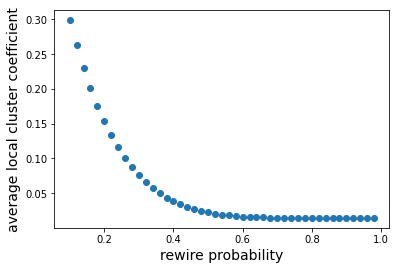

In [ ]:
plt.scatter(P, avg_avglcc)
plt.xlabel('rewire probability',fontsize=14)
plt.ylabel('average local cluster coefficient',fontsize=14)

# Problem 8

In [ ]:
g = ig.Graph.Barabasi(n=10000,
                      m=5,
                      directed = 'True')
in_deg = g.degree(mode='in')
X = plfit.plfit(in_deg)
print(X.plfit())

(14, 2.076183055673917)


/usr/local/lib/python3.7/dist-packages/plfit/plfit.py:1012: RuntimeWarning: divide by zero encountered in log
  alpha = 1.0 + float(nn) * (sum(log(xx/(float(xmin)-0.5))))**-1
/usr/local/lib/python3.7/dist-packages/plfit/plfit.py:1012: RuntimeWarning: invalid value encountered in log
  alpha = 1.0 + float(nn) * (sum(log(xx/(float(xmin)-0.5))))**-1
/usr/local/lib/python3.7/dist-packages/plfit/plfit.py:1065: RuntimeWarning: divide by zero encountered in true_divide
  model_cdf = 1.0-(zz.astype('float')/float(xmin))**(1.0-alpha)
/usr/local/lib/python3.7/dist-packages/plfit/plfit.py:1065: RuntimeWarning: invalid value encountered in true_divide
  model_cdf = 1.0-(zz.astype('float')/float(xmin))**(1.0-alpha)


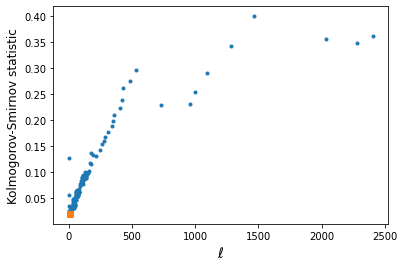

In [ ]:
ax = plt.figure(1)
ax = X.xminvsks()
ax.set_xlabel(r'$\ell$',fontsize=14)
ax.set_ylabel('Kolmogorov-Smirnov statistic',fontsize=12);

In [ ]:
KS_tst = X.test_pl(niter=100)

/usr/local/lib/python3.7/dist-packages/plfit/plfit.py:1012: RuntimeWarning: divide by zero encountered in log
  alpha = 1.0 + float(nn) * (sum(log(xx/(float(xmin)-0.5))))**-1
/usr/local/lib/python3.7/dist-packages/plfit/plfit.py:1012: RuntimeWarning: invalid value encountered in log
  alpha = 1.0 + float(nn) * (sum(log(xx/(float(xmin)-0.5))))**-1
/usr/local/lib/python3.7/dist-packages/plfit/plfit.py:1065: RuntimeWarning: divide by zero encountered in true_divide
  model_cdf = 1.0-(zz.astype('float')/float(xmin))**(1.0-alpha)
/usr/local/lib/python3.7/dist-packages/plfit/plfit.py:1065: RuntimeWarning: invalid value encountered in true_divide
  model_cdf = 1.0-(zz.astype('float')/float(xmin))**(1.0-alpha)


p(100) = 0.920


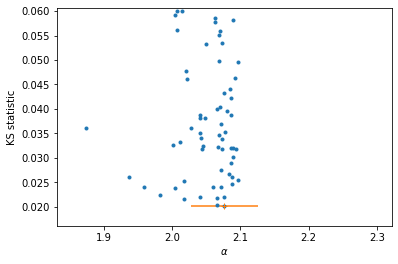

In [ ]:
ax = plt.figure(1)
ax = X.alphavsks()

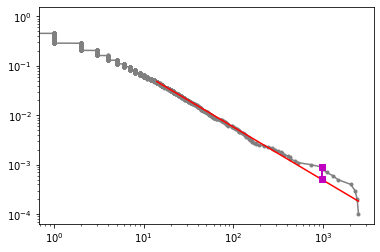

In [ ]:
X.plotcdf(pointcolor='grey', pointmarker='.',zoom=False)